In [1]:
import pandas as pd
import numpy as np
!pip install pycmap
import pycmap
import plotly.express as px


import matplotlib.pyplot as plt

Defaulting to user installation because normal site-packages is not writeable


In [2]:
!pip install cartopy
import cartopy.crs as ccrs         # to plot maps with different projections
import cartopy.feature as cfeature # to plot coastlines, land, borders, etc.

Defaulting to user installation because normal site-packages is not writeable


ERROR 1: PROJ: proj_create_from_database: Open of /opt/conda/share/proj failed


In [3]:
key = "16065440-182a-11ed-a38a-6594a3860394"
api = pycmap.API(token=key)       # call api using your unique API key

In [4]:
HOT_bottle = api.get_dataset('tblHOT_Bottle')
# HOT_bottle.keys()

count_null = []
for i in range(0, 67):
    col_name = HOT_bottle.keys()[i]
    count_null.append({col_name: HOT_bottle[col_name].isna().sum()})
# count_null

In [37]:
HOT_bottle.head()

,botid_HOT,time,date_time,pressure_ctd_bottle_hot,potential_temperature_ctd_bottle_hot,potential_density_ctd_bottle_hot,temperature_ctd_bottle_hot,salinity_ctd_bottle_hot,oxygen_ctd_bottle_hot,salinity_bottle_hot,...,pe4_bottle_hot,pe5_bottle_hot,pe10_bottle_hot,p15n_bottle_hot,PP_l12_bottle_hot,PP_d12_bottle_hot,NO2_bottle_hot,lat,lon,depth
0,10200312,1988-10-31T00:00:00,15704.0,4.7,26.2868,23.122,26.2879,35.2344,224.6,35.2450,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.75,-158.0,4.7
1,10200311,1988-10-31T00:00:00,15529.0,39.4,26.1785,23.149,26.1874,35.2253,219.5,35.2368,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.75,-158.0,39.4
2,10200310,1988-10-31T00:00:00,15401.0,99.4,21.7782,24.468,21.7978,35.2462,218.0,35.2578,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.75,-158.0,99.4
3,10200309,1988-10-31T00:00:00,15220.0,150.3,19.3937,24.989,19.4209,35.0890,201.9,35.0989,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.75,-158.0,150.3
4,10200308,1988-10-31T00:00:00,15059.0,191.8,17.6737,25.292,17.7063,34.9198,214.4,34.9293,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.75,-158.0,191.8


In [6]:
hot=HOT_bottle[['oxygen_ctd_bottle_hot', 'potential_temperature_ctd_bottle_hot','salinity_ctd_bottle_hot','PO4_bottle_hot',
       'NO2_NO3_bottle_hot', 'SiO4_bottle_hot','chl_bottle_hot','depth' ]]
hot=hot[hot.depth<300].dropna() # use the depth only in the top 300 meters. 

hot = hot.reset_index(drop=True)
print(hot.columns)
print(hot.shape)

Index(['oxygen_ctd_bottle_hot', 'potential_temperature_ctd_bottle_hot',
       'salinity_ctd_bottle_hot', 'PO4_bottle_hot', 'NO2_NO3_bottle_hot',
       'SiO4_bottle_hot', 'chl_bottle_hot', 'depth'],
      dtype='object')
(2383, 8)


In [7]:
# bins_depth = []
# labels = []
# for i in range(0, 14):
#     bins_depth.append(i*20)
#     labels.append(i)
# labels.remove(0)

# hot['binned'] = pd.cut(hot['depth'], bins=bins_depth, labels=labels)

In [8]:
column_name = hot.columns
# column_name.drop(['depth', 'binned'])

In [9]:
features=np.array(hot.drop(columns='chl_bottle_hot'))
features=features/np.std(features,axis=0)

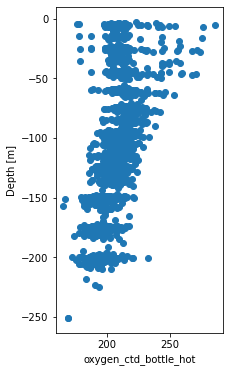

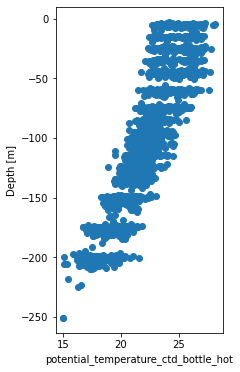

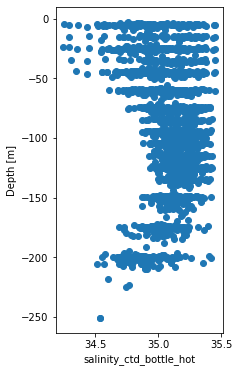

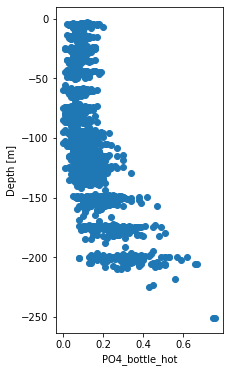

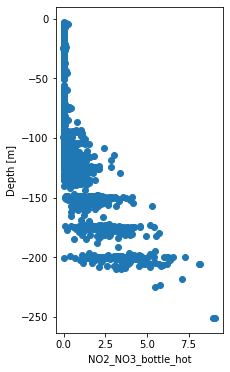

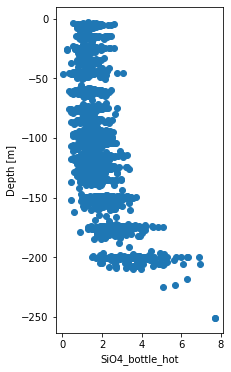

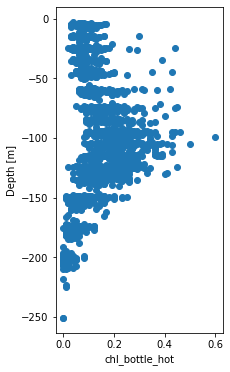

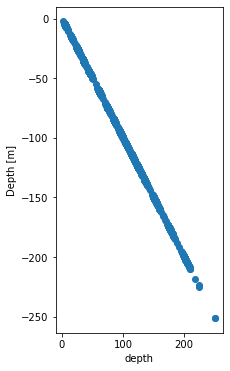

In [10]:
for i in range(8):
    plt.figure(figsize=(3,6))
    # plt.subplot(i+1,8,i+1)
    plt.scatter(hot[column_name[i]],-hot['depth'])
    plt.xlabel(column_name[i])
    plt.ylabel('Depth [m]')

In [16]:
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture 
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [17]:
# Standardize data
scaler = StandardScaler() 
scaled_hot = scaler.fit_transform(hot) 
  
# Normalizing the Data 
normalized_hot = normalize(scaled_hot) 
  
# Converting the numpy array into a pandas DataFrame 
normalized_hot = pd.DataFrame(normalized_hot) 
  
# Reducing the dimensions of the data 
pca = PCA(n_components = 4) 
X_principal = pca.fit_transform(normalized_hot) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2', 'P3', 'P4'] 
  
X_principal.head(2)

,P1,P2,P3,P4
0,-0.744496,0.275273,0.286930,-0.297030
1,-0.714562,0.156688,0.148154,-0.178729


In [18]:
pca.explained_variance_ratio_

array([0.45119467, 0.23732713, 0.11800566, 0.07600177])

In [19]:
gmm = GaussianMixture(n_components = 4) 
gmm.fit(X_principal)

GaussianMixture(n_components=4)

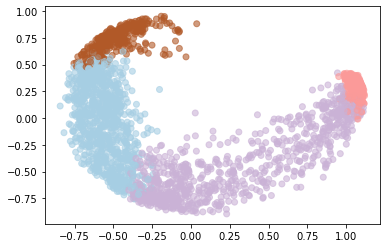

In [22]:
# Visualizing the clustering, only use the first two components. 
plt.scatter(X_principal['P1'], X_principal['P2'],  
           c = GaussianMixture(n_components = 4).fit_predict(X_principal), cmap ='Paired', alpha = 0.6) 
plt.show() 

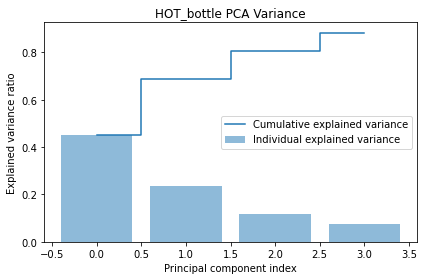

In [23]:
exp_var_pca = pca.explained_variance_ratio_

cum_sum_eigenvalues = np.cumsum(exp_var_pca)

plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.title('HOT_bottle PCA Variance')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'BIC of # Clusters')

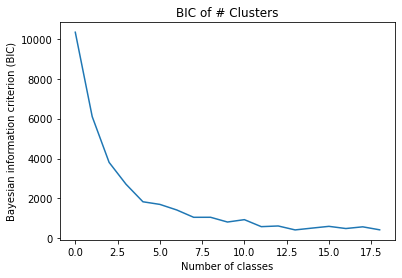

In [24]:
BIC=np.array([]);
for K in range(1,20):
    gmm = GaussianMixture(n_components=K)
    gmm.fit_predict(X_principal)
    bic=gmm.bic(X_principal)
    BIC=np.append(BIC,bic)

plt.plot(BIC); 
plt.xlabel('Number of classes'); 
plt.ylabel('Bayesian information criterion (BIC)')
plt.title('BIC of # Clusters')
# how to choose number of classes? Points without too much changes or other criteriasa

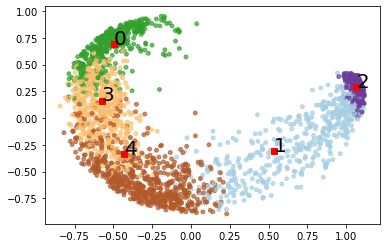

In [35]:
gmm = GaussianMixture(n_components = 5) 
gmm.fit(X_principal)

x_mean,y_mean=gmm.means_[:,0],gmm.means_[:,1]

# Visualizing the clustering, only use the first two components. 
plt.scatter(X_principal['P1'], X_principal['P2'],  
           c = gmm.fit_predict(X_principal), cmap = 'Paired', alpha = 0.7, s = 15) 

for k in range(5):
    plt.plot(x_mean[k],y_mean[k],'rs',markersize=6)
    plt.annotate(str(k), (x_mean[k],y_mean[k]), fontsize=20) 
      
plt.show() 

In [ ]:
# how to get the feature from GMM

In [26]:
kmeans_inertias = []

for i in range(1, 21):
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans_pca.fit(X_principal)
    kmeans_inertias.append(kmeans_pca.inertia_)

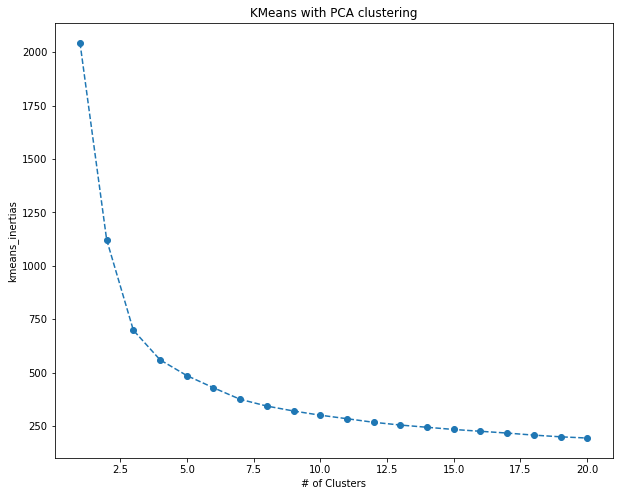

In [27]:
plt.figure(figsize=(10, 8))
plt.plot(range(1,21), kmeans_inertias, marker = 'o', linestyle = '--')
plt.xlabel("# of Clusters")
plt.ylabel("kmeans_inertias")
plt.title("KMeans with PCA clustering")
plt.show()

In [ ]:
# 10 clusters maybe?